# Comparación

Métricas de Evaluación del Modelo de Regresión Lineal:
{'RMSE': 2.3783697847961367, 'MAE': 1.6466656197147511, 'R2': 0.7241341236974022}

Métricas de Evaluación del Modelo de Random Forest:
{'RMSE': 1.9487730641858232, 'MAE': 1.1645569620253164, 'R2': 0.8147911386865877}


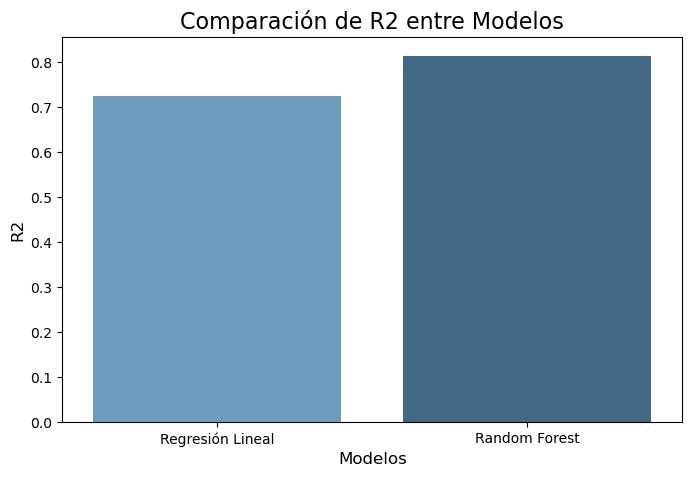

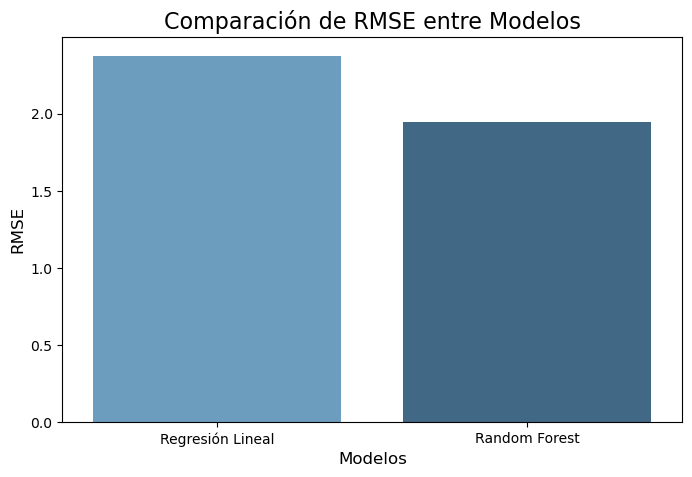

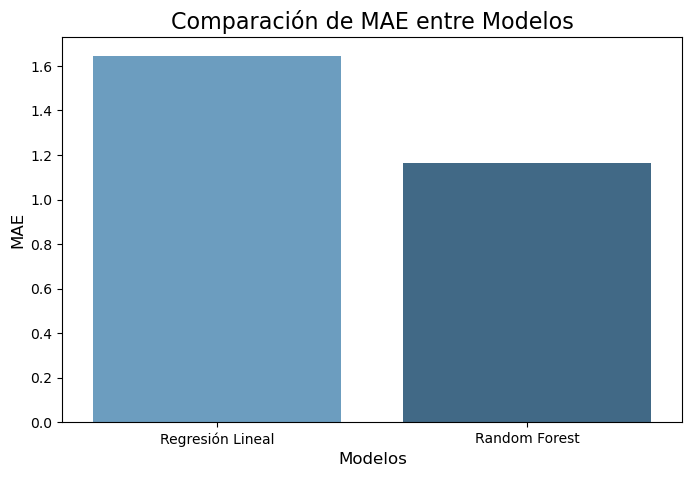

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data = pd.read_csv('student-mat.csv', sep=';')  
data_dummies = pd.get_dummies(data, drop_first=True)
X = data_dummies.drop(['G3'], axis=1)  
y = data_dummies['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_01 = LinearRegression()
modelo_01.fit(X_train, y_train)

modelo_02 = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_02.fit(X_train, y_train)

y_pred_lr = modelo_01.predict(X_test)  # Regresión Lineal
y_pred_rf = modelo_02.predict(X_test)  # Random Forest

metrics_lr = {
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),
    'MAE': metrics.mean_absolute_error(y_test, y_pred_lr),
    'R2': metrics.r2_score(y_test, y_pred_lr)
}

metrics_rf = {
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)),
    'MAE': metrics.mean_absolute_error(y_test, y_pred_rf),
    'R2': metrics.r2_score(y_test, y_pred_rf)
}

print("Métricas de Evaluación del Modelo de Regresión Lineal:")
print(metrics_lr)
print("\nMétricas de Evaluación del Modelo de Random Forest:")
print(metrics_rf)

models = ['Regresión Lineal', 'Random Forest']
r2_values = [metrics_lr['R2'], metrics_rf['R2']]

df_r2 = pd.DataFrame({
    'Modelo': models,
    'R2': r2_values
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='R2', data=df_r2, palette="Blues_d", hue='Modelo')

plt.title("Comparación de R2 entre Modelos", fontsize=16)
plt.ylabel("R2", fontsize=12)
plt.xlabel("Modelos", fontsize=12)
plt.show()
rmse_values = [metrics_lr['RMSE'], metrics_rf['RMSE']]

df_rmse = pd.DataFrame({
    'Modelo': models,
    'RMSE': rmse_values
})

plt.figure(figsize=(8, 5))

# Gráfico de barras con 'hue' 
sns.barplot(x='Modelo', y='RMSE', data=df_rmse, palette="Blues_d", hue='Modelo')

plt.title("Comparación de RMSE entre Modelos", fontsize=16)
plt.ylabel("RMSE", fontsize=12)
plt.xlabel("Modelos", fontsize=12)
plt.show()

mae_values = [metrics_lr['MAE'], metrics_rf['MAE']]

df_mae = pd.DataFrame({
    'Modelo': models,
    'MAE': mae_values
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='MAE', data=df_mae, palette="Blues_d", hue='Modelo')
plt.title("Comparación de MAE entre Modelos", fontsize=16)
plt.ylabel("MAE", fontsize=12)
plt.xlabel("Modelos", fontsize=12)
plt.show()
